In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , KFold
X = np.array([[1], [2], [3], [4], [5] ,[6], [7], [8], [9], [10]])
y = np.array([2, 3, 4, 5, 6 ,7, 4, 10, 2, 12])
#bias
X = np.hstack((np.ones((X.shape[0], 1)), X))
#entraînement=70% && test=30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.dot(errors.T, errors)
    return cost

In [14]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = []
    for i in range(num_iters):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = (1 / m) * X.T.dot(errors)
        theta -= alpha * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        if i % 100 == 0: 
            print(f"Iteration {i}: Cost {cost}")
            predictions = X.dot(theta)
            # Tracer les points de données
            plt.scatter(X[:, 1], y, color='blue', label='Data Points')
            # Tracer la ligne de régression
            plt.plot(X[:, 1], predictions, color='red', label='Regression Line')
            plt.xlabel('Feature')
            plt.ylabel('Target')
            plt.legend()
            plt.show()
    return theta, cost_history

Iteration 0: Cost 10.001267492711369


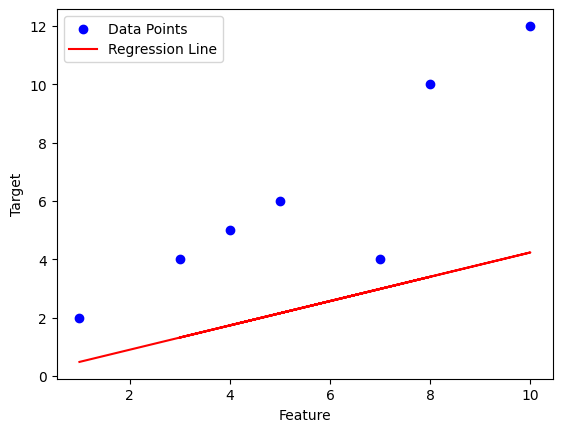

Iteration 100: Cost 1.2601036605803315


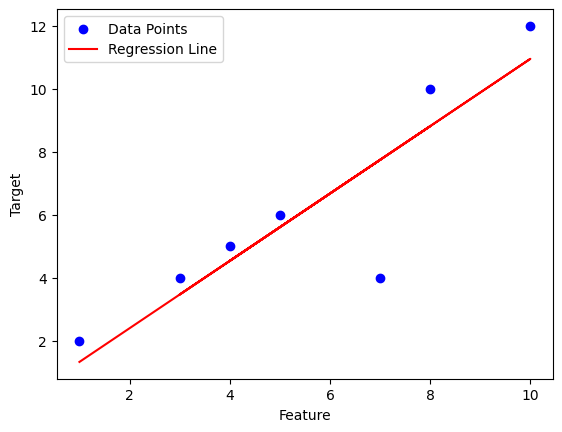

Iteration 200: Cost 1.2544845861318192


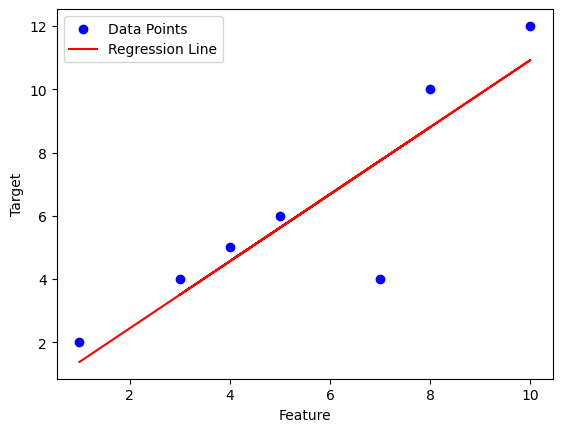

Iteration 300: Cost 1.2508248070407841


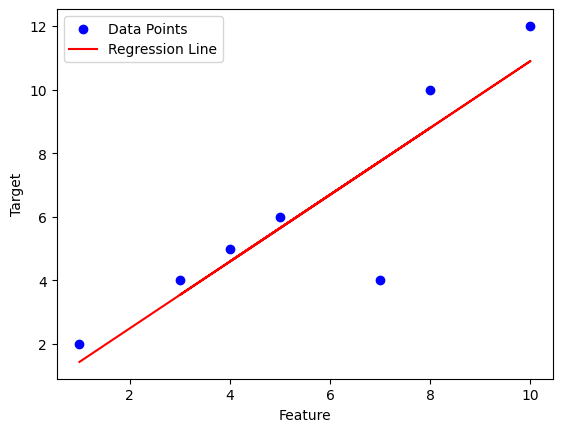

Iteration 400: Cost 1.248441143482326


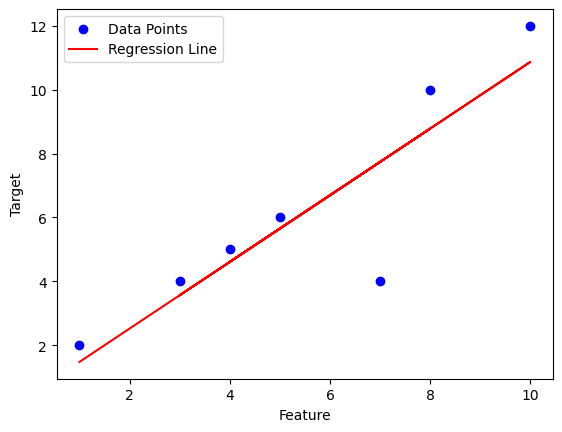

Iteration 500: Cost 1.246888631208064


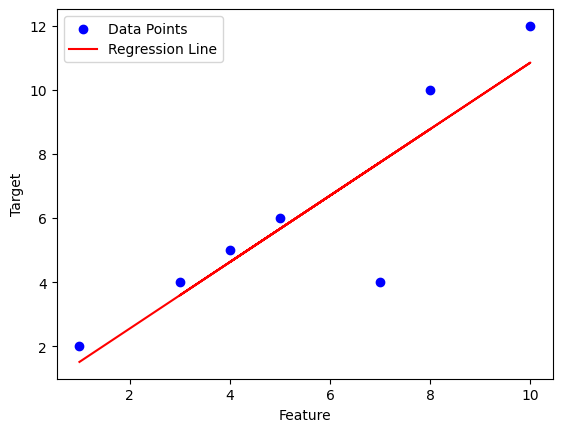

Iteration 600: Cost 1.2458774589924289


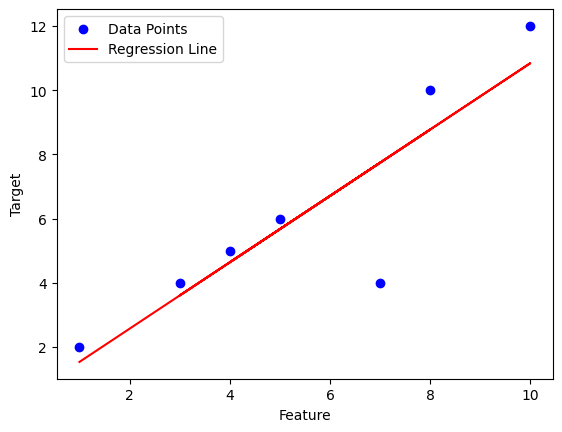

Iteration 700: Cost 1.2452188688694243


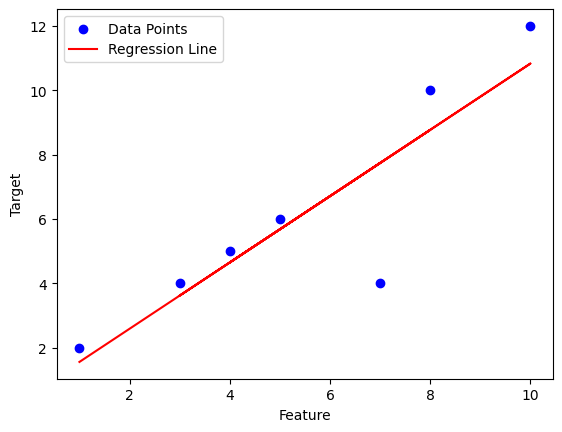

Iteration 800: Cost 1.2447899202260453


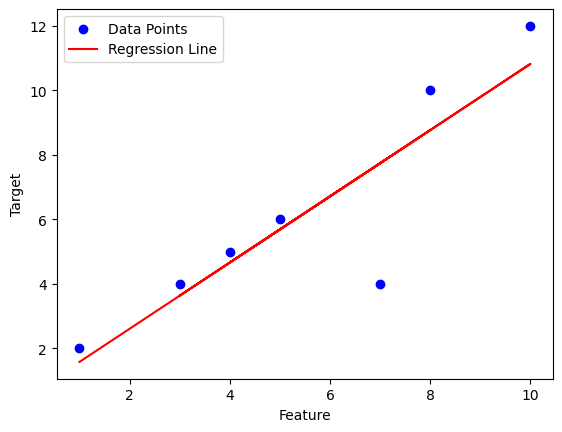

Iteration 900: Cost 1.244510540180355


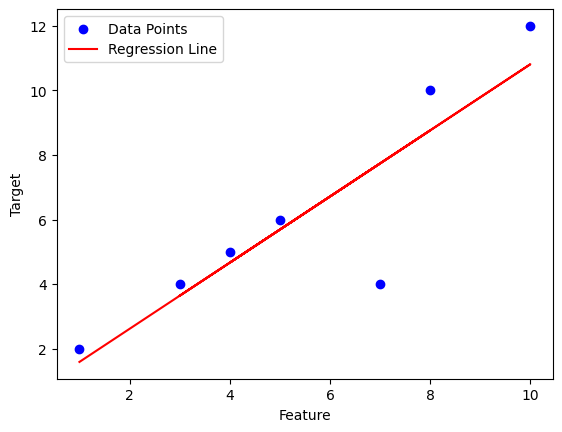

Learned parameters: j(a,b) [0.57778403 1.02294066]
Final cost: 1.244330036644859


In [12]:
# Initialisation de theta
theta = np.zeros(X_train.shape[1])
alpha = 0.01  #learning rate
num_iters = 1000  #Nombre d'itérations
# Apprentissage des paramètres theta
theta, cost_history = gradient_descent(X_train, y_train, theta, alpha, num_iters)
print("Learned parameters: j(a,b)", theta)
print("Final cost:", cost_history[-1])

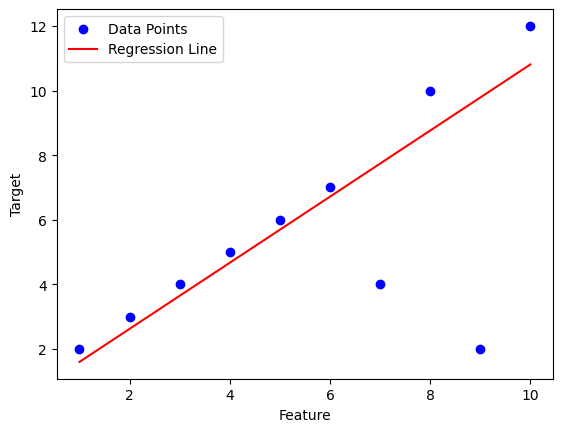

In [7]:
predictions = X.dot(theta)
# Tracer les points de données
plt.scatter(X[:, 1], y, color='blue', label='Data Points')
# Tracer la ligne de régression
plt.plot(X[:, 1], predictions, color='red', label='Regression Line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()